instal Modul Python Google Search Results

In [2]:
!pip install google-search-results
from serpapi import GoogleSearch  # Make sure this line is present to import GoogleSearch
from urllib.parse import *

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=953f4f4742d2082165584db2d7d21df0e6747c9eb166237036668556e427435e
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


Import Library

In [3]:
from serpapi import GoogleSearch
from urllib.parse import *


Scrapping Local Results
mengambil data 10 objek (Caffe) yang memiliki ≥ 100 reviews

In [4]:
params = {
  "engine": "google_maps",
  "q": "caffe", # objek yang dicari
  "ll": "@-6.5481531,106.4878679,10z", #koordinat tempat sekitar
  "type": "search",
  "api_key": "203da87ec763566500b2c5e502840dc8ba9d27efcf8ecc53c8f9cef4af34ce5d"
}
search = GoogleSearch(params)

lIdx = 0 # indeks yang ditampilkan dari data
lSum = 7 # Batas jumlah data yang ditampilkan
local_results = []

while lIdx  <= lSum:
  results = search.get_dict()

  # Periksa apakah API mengembalikan error
  if 'error' in results:
    print(f"Error API: {results['error']}")
    break # Keluar dari loop jika ada error

  # Periksa apakah kunci 'local_results' ada dalam respons
  if 'local_results' in results:
    for Result in results["local_results"]:
      # The if statement should be indented within the for loop
      if lIdx <= lSum:

        # Use the get method with a default value to safely access the 'reviews' key
        reviews = Result.get("reviews", 0)

        #seleksi data (jangan ambil data jika jumlah review < 50 )
        if reviews < 50:  # Check the reviews variable now
          lIdx += 1
          continue

        # Append data sesuai dengan batas jumlah yang sudah ditentukan
        local_results.append({'Nama': Result["title"],
                             'data_id': Result["data_id"],
                             'total_reviews': reviews}); # Use the reviews variable

  #menghilangkan pagination pada web, sehingga data yang terambil bisa banyak
  if "next" in results.get("serpapi_pagination", {}):
    # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
    search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

  else:
    break

In [5]:
for LR in local_results:
  print(LR)

{'Nama': 'Kopi Kinca', 'data_id': '0x2e69f3fb2ec82ac3:0x3d62acb6615488cb', 'total_reviews': 516}
{'Nama': 'La Isola Caffe, Dolce & Kitchen', 'data_id': '0x2e69c5c439562c31:0x1160e34cf3e16de7', 'total_reviews': 566}
{'Nama': 'Point Coffee', 'data_id': '0x2e698d7dbd1138a7:0xd29fc6ee17b5f468', 'total_reviews': 140}
{'Nama': 'Caffe Beringin', 'data_id': '0x2e41ffdfda5363c3:0xea9b84392ed834be', 'total_reviews': 55}
{'Nama': 'Iskandar Muda Caffe & Resto', 'data_id': '0x2e69ef793c536109:0xc9782748a8e2f0b9', 'total_reviews': 52}
{'Nama': 'Caffe Cerry', 'data_id': '0x2e69efe10337e1e5:0xb02031525531cf49', 'total_reviews': 149}
{'Nama': 'Pakons Caffe', 'data_id': '0x2e69f9f3840b8335:0xd8470d585f8c8061', 'total_reviews': 167}
{'Nama': 'GARDEN CAFE & ASTRO WASH', 'data_id': '0x2e69939b19d376a7:0xef7ee31724f1cb06', 'total_reviews': 206}
{'Nama': 'Caffe Tenda SARI RASA', 'data_id': '0x2e69c8e927c93af3:0xa10ac890c978c636', 'total_reviews': 115}


Scrapping Reviews
Mengambil 100 data dari masing-masing objek (Caffe) sesuai dengan jumlah index yang diinginkan

In [7]:
data = {'Caffe_name':[],
        'name':[],
        'rating':[],
        'review':[]}

for LR in local_results:

  params = {
    "engine": "google_maps_reviews",
    "data_id": "",
    "api_key": "203da87ec763566500b2c5e502840dc8ba9d27efcf8ecc53c8f9cef4af34ce5d" #Fixed: This line was causing the indentation error. It's now aligned correctly and the previous incorrect content is removed.
  }

  params["data_id"] = LR['data_id']

  search = GoogleSearch(params)

  lIdx = 0 # Angka indeks dari data
  lSum = 30 # Batas jumlah data yang ditampilkan

  while lIdx <= lSum:
    results = search.get_dict()

    for Result in results["reviews"]:
      lIdx += 1

      if lIdx <= lSum:
        # Append data sesuai dengan batas jumlah yang sudah ditentukan
        data['Caffe_name'].append(LR['Nama']);
        data['name'].append(Result["user"]["name"]);
        data['rating'].append(Result["rating"]);
        data['review'].append(Result.get("snippet", ""));

    #menghilangkan pagination pada web, sehingga data yang terambil bisa banyak
    if "next" in results.get("serpapi_pagination", {}):
      # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
      search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

    else:
      break

review_original = data['review']

Export Data Scrapping

In [8]:
import pandas as pd
import os

dfScrap = pd.DataFrame(data)

# Create the directory if it doesn't exist
os.makedirs('File CSV', exist_ok=True)

dfScrap.to_csv('File CSV/reviewCaffeBogor.csv', index = False)

2. Tahap Case Folding

Import Library

In [9]:

import re
import string


Proses Listing

In [10]:
import re
import string

review_clean = []  # Initialize review_clean as an empty list

for review in review_original:
    # Remove Unicode
    review_test = re.sub(r'[^\x00-\x7F]+', ' ', review)
    # Remove Mentions
    review_test = re.sub(r'@\w+', '', review_test)
    # Lowercase the document
    review_test = review_test.lower()
    # Remove punctuations
    review_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', review_test)
    # Remove the numbers
    review_test = re.sub(r'[0-9]', '', review_test)
    # Remove the doubled space
    review_test = re.sub(r'\s{2,}', ' ', review_test)

    review_clean.append(review_test) # Now you can append to review_clean

3. Tahap Tokenizing

Import Library

In [11]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Proses Listing

In [12]:
import nltk

# Download the necessary data for the Punkt Sentence Tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize, word_tokenize

review_tokenized = []

for review in review_clean:
    review_tokenized.append(word_tokenize(review))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


4. Tahap Filtering (Stopword Removal)

Import Library

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Proses Listing

In [14]:
review_filtered = []
listStopword =  set(stopwords.words('english'))

for review in review_tokenized:

  review_each_filtered = []

  for r in review:
    if r not in listStopword:
        review_each_filtered.append(r)

  review_filtered.append(review_each_filtered)


5. Tahap Stemming

menggunakan algoritma SnowballStemmer

In [15]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

review_stemmed = []

for review in review_filtered:

  review_each_stemmed = []

  for r in review:
    review_each_stemmed.append(stemmer.stem(r))

  review_stemmed.append(review_each_stemmed)

6. Export Hasil ke CSV

Import Library & Proses Listing

In [16]:
import pandas as pd

data_preprocessed = data
data_preprocessed['review'] = review_stemmed


df = pd.DataFrame(data_preprocessed)
df

,Caffe_name,name,rating,review
0,Kopi Kinca,Nietta,4.0,"[twice, last, two, three, month, ago, cousin, ..."
1,Kopi Kinca,Ami Savitri,4.0,"[locat, gf, btpn, tower, provid, nice, place, ..."
2,Kopi Kinca,IRV,4.0,"[roomi, bright, larg, spacious, good, big, gro..."
3,Kopi Kinca,Abby Marcel,5.0,"[place, comfort, breakfast, lunch, shop, locat..."
4,Kopi Kinca,Apoorva Goel,5.0,"[walk, quick, breakfast, ice, latt, waffl, out..."
...,...,...,...,...
265,Caffe Tenda SARI RASA,Mahar Dini,4.0,"[enak, buat, nongkrong]"
266,Caffe Tenda SARI RASA,Muhammad Dhani,5.0,"[pp, jakarta, sukabumi, harus, mampir, disini]"
267,Caffe Tenda SARI RASA,Subhan Baetuni,5.0,"[cocok, untuk, kumpul, keluarga, dan, teman, t..."
268,Caffe Tenda SARI RASA,Bay Suhandi,5.0,"[murah, enak, luar, biasa]"


In [17]:
df.to_csv('File CSV/reviewCaffeBogor_setelah_preprocessing.csv', index=False)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [21]:
filename = "./File CSV/reviewCaffeBogor.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,Caffe_name,name,rating,review
0,Kopi Kinca,Nietta,4.0,I've been there twice for the last two or thre...
1,Kopi Kinca,Ami Savitri,4.0,"Located at GF of BTPN Tower, it provides nice ..."
2,Kopi Kinca,IRV,4.0,"Roomy, bright, large, spacious.\n\nThis is goo..."
3,Kopi Kinca,Abby Marcel,5.0,The place is comfort for breakfast and lunch. ...
4,Kopi Kinca,Apoorva Goel,5.0,Walked in for a quick breakfast. The iced latt...


In [22]:
df.drop(columns = ['Caffe_name', 'name'], inplace = True)
df.columns = ['rating', 'review']
df.head()

,rating,review
0,4.0,I've been there twice for the last two or thre...
1,4.0,"Located at GF of BTPN Tower, it provides nice ..."
2,4.0,"Roomy, bright, large, spacious.\n\nThis is goo..."
3,5.0,The place is comfort for breakfast and lunch. ...
4,5.0,Walked in for a quick breakfast. The iced latt...


In [23]:
import string
import re

In [30]:
def clean_text(text):
    # Check if 'text' is a list
    if isinstance(text, list):
        # If it is, join its elements into a single string
        text = ' '.join(text)
    # Ensure text is a string (handle potential NaN or other non-string types)
    text = str(text)  # Convert to string to handle non-string values
    # Then, proceed with the rest of the cleaning
    return re.sub('[^a-zA-Z]', ' ', text).lower()

df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x)) # Changed 'Review' to 'review'
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

def count_punct(text):
    # Ensure text is a string
    text = str(text) # Handle potential non-string types like float
    count = sum([1 for char in text if char in string.punctuation])
    # Avoid division by zero if text is empty after removing spaces
    if len(text) - text.count(" ") == 0:
        return 0
    return round(count/(len(text) - text.count(" ")), 3)*100

df['review_len'] = df['review'].apply(lambda x: len(str(x)) - str(x).count(" ")) # Convert to string to handle non-string
df['punct'] = df['review'].apply(lambda x: count_punct(x))
df.head()

,rating,review,cleaned_text,label,review_len,punct
0,4.0,I've been there twice for the last two or thre...,i ve been there twice for the last two or thre...,1,287,5.2
1,4.0,"Located at GF of BTPN Tower, it provides nice ...",located at gf of btpn tower it provides nice ...,1,187,4.8
2,4.0,"Roomy, bright, large, spacious.\n\nThis is goo...",roomy bright large spacious this is good ...,1,207,6.3
3,5.0,The place is comfort for breakfast and lunch. ...,the place is comfort for breakfast and lunch ...,1,192,3.1
4,5.0,Walked in for a quick breakfast. The iced latt...,walked in for a quick breakfast the iced latt...,1,279,2.5


In [31]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,rating,review,cleaned_text,label,review_len,punct,tokens
0,4.0,I've been there twice for the last two or thre...,i ve been there twice for the last two or thre...,1,287,5.2,"[i, ve, been, there, twice, for, the, last, tw..."
1,4.0,"Located at GF of BTPN Tower, it provides nice ...",located at gf of btpn tower it provides nice ...,1,187,4.8,"[located, at, gf, of, btpn, tower, it, provide..."
2,4.0,"Roomy, bright, large, spacious.\n\nThis is goo...",roomy bright large spacious this is good ...,1,207,6.3,"[roomy, bright, large, spacious, this, is, goo..."
3,5.0,The place is comfort for breakfast and lunch. ...,the place is comfort for breakfast and lunch ...,1,192,3.1,"[the, place, is, comfort, for, breakfast, and,..."
4,5.0,Walked in for a quick breakfast. The iced latt...,walked in for a quick breakfast the iced latt...,1,279,2.5,"[walked, in, for, a, quick, breakfast, the, ic..."


In [32]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,rating,review,cleaned_text,label,review_len,punct,tokens,lemmatized_review
0,4.0,I've been there twice for the last two or thre...,i ve been there twice for the last two or thre...,1,287,5.2,"[i, ve, been, there, twice, for, the, last, tw...",twice last two three month ago cousin took fir...
1,4.0,"Located at GF of BTPN Tower, it provides nice ...",located at gf of btpn tower it provides nice ...,1,187,4.8,"[located, at, gf, of, btpn, tower, it, provide...",located gf btpn tower provides nice place enjo...
2,4.0,"Roomy, bright, large, spacious.\n\nThis is goo...",roomy bright large spacious this is good ...,1,207,6.3,"[roomy, bright, large, spacious, this, is, goo...",roomy bright large spacious good big group cof...
3,5.0,The place is comfort for breakfast and lunch. ...,the place is comfort for breakfast and lunch ...,1,192,3.1,"[the, place, is, comfort, for, breakfast, and,...",place comfort breakfast lunch shop located str...
4,5.0,Walked in for a quick breakfast. The iced latt...,walked in for a quick breakfast the iced latt...,1,279,2.5,"[walked, in, for, a, quick, breakfast, the, ic...",walked quick breakfast iced latte waffle outst...


In [35]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['rating']==5.0])} rows")

Input data has 270 rows and 8 columns
rating 1.0 = 18 rows
rating 2.0 = 7 rows
rating 3.0 = 13 rows
rating 4.0 = 57 rows
rating 5.0 = 175 rows


Number of null in label: 0
Number of null in text: 6


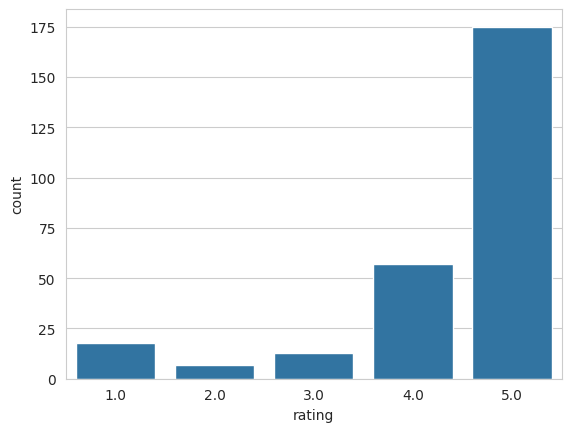

In [37]:
# Missing values in the dataset
print(f"Number of null in label: { df['rating'].isnull().sum() }")
print(f"Number of null in text: { df['review'].isnull().sum()}")
sns.countplot(x='rating', data=df);

In [40]:
from wordcloud import WordCloud

df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0)]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0)]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

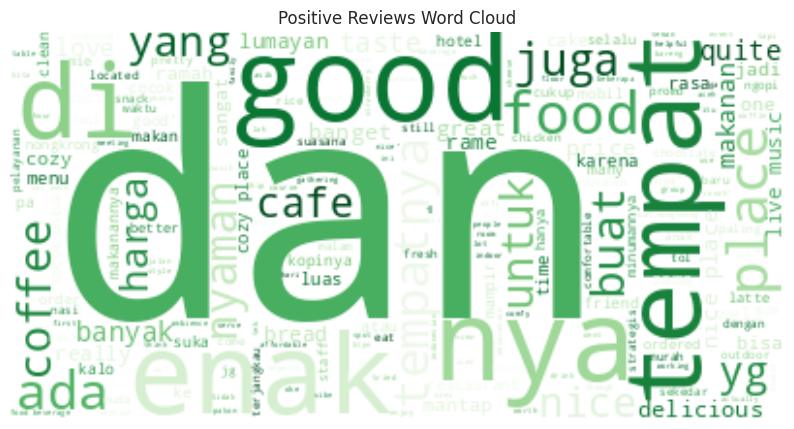

In [41]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

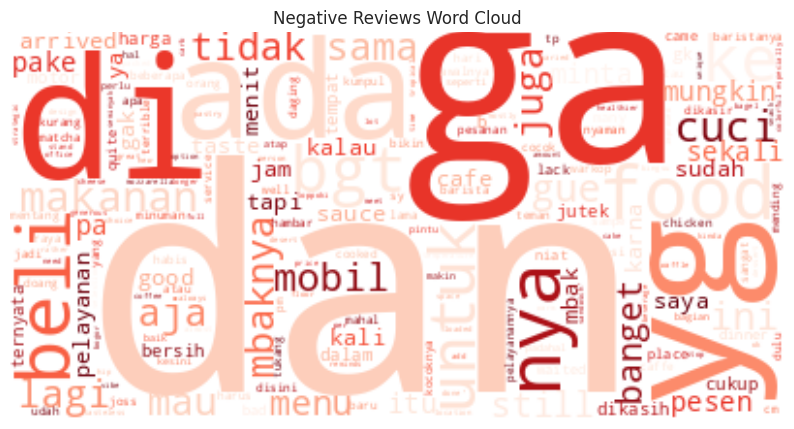

In [42]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()


In [43]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(270, 3)
(270,)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(189, 3)
(81, 3)
(189,)
(81,)


In [47]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)
X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443
0,80,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319402,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319402,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.228432,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2764,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.319402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.575422,0.0,0.174518,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.193036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,94,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,

In [48]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      1.00      0.90        66

    accuracy                           0.81        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.66      0.81      0.73        81



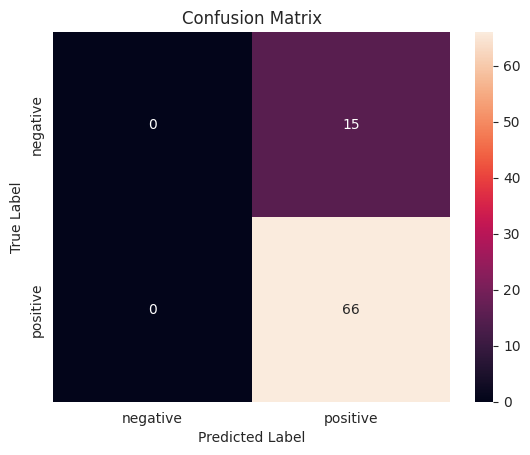

In [51]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      0.98      0.89        66

    accuracy                           0.80        81
   macro avg       0.41      0.49      0.45        81
weighted avg       0.66      0.80      0.73        81



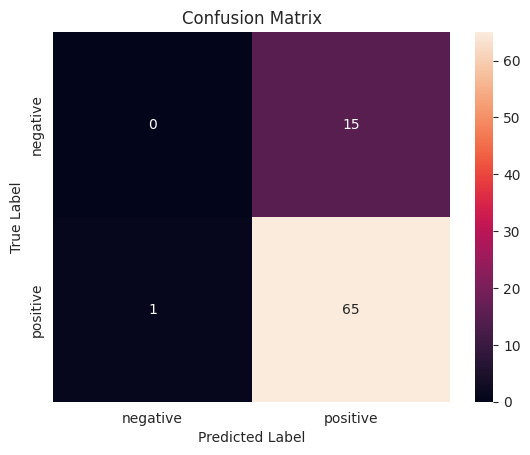

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      1.00      0.90        66

    accuracy                           0.81        81
   macro avg       0.41      0.50      0.45        81
weighted avg       0.66      0.81      0.73        81



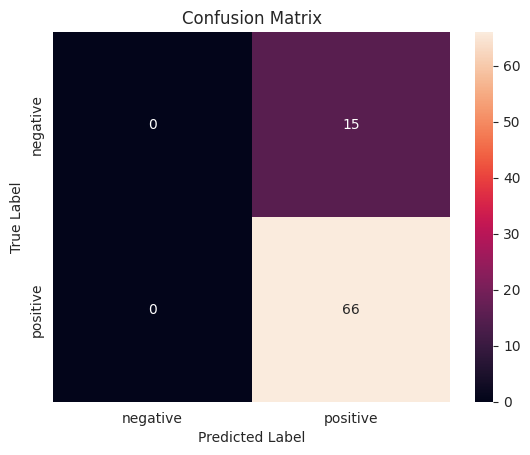

In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.82      1.00      0.90        66

    accuracy                           0.83        81
   macro avg       0.91      0.53      0.51        81
weighted avg       0.86      0.83      0.76        81



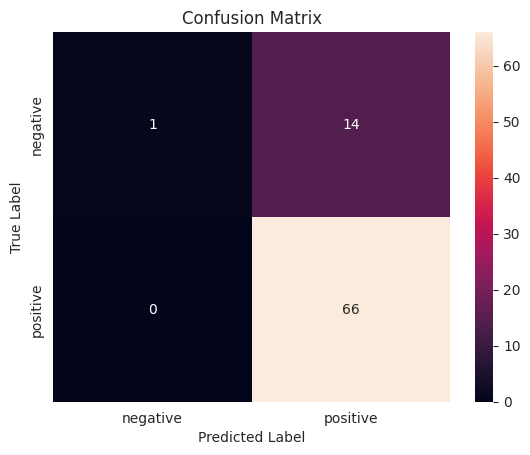

In [54]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.81      0.98      0.89        66

    accuracy                           0.80        81
   macro avg       0.41      0.49      0.45        81
weighted avg       0.66      0.80      0.73        81



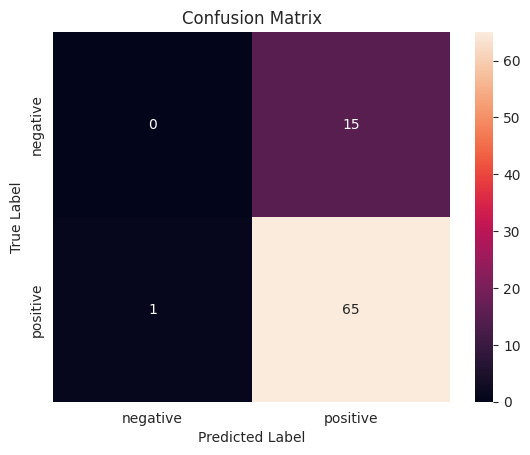

In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.50      0.13      0.21        15
           1       0.83      0.97      0.90        66

    accuracy                           0.81        81
   macro avg       0.67      0.55      0.55        81
weighted avg       0.77      0.81      0.77        81



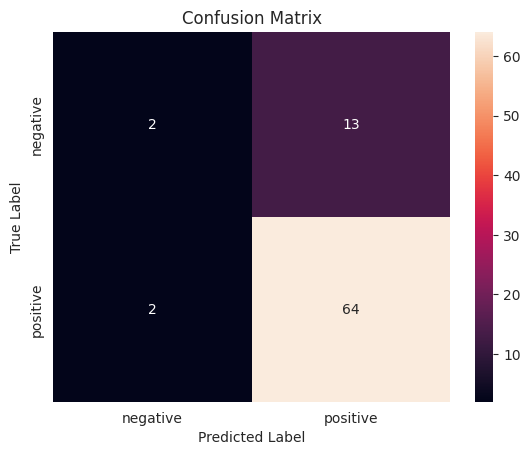

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.8783625730994151 
 precision - 0.8783625730994151 
 recall - 1.0 
 f1 - 0.9350700280112045 

Logistic Regression
 accuracy - 0.8783625730994151 
 precision - 0.8783625730994151 
 recall - 1.0 
 f1 - 0.9350700280112045 

Random Forest
 accuracy - 0.8888888888888887 
 precision - 0.8877192982456139 
 recall - 1.0 
 f1 - 0.9404668534080299 

SVM
 accuracy - 0.8941520467836257 
 precision - 0.897626418988648 
 recall - 0.9941176470588236 
 f1 - 0.9428291316526611 

KNN
 accuracy - 0.8628654970760234 
 precision - 0.8812521499828001 
 recall - 0.9764705882352942 
 f1 - 0.925858585858586 

Extra Trees
 accuracy - 0.8894736842105264 
 precision - 0.9204785861713105 
 recall - 0.9580882352941176 
 f1 - 0.9381113657584246 



In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)


In [59]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8395061728395061

In [60]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[1 1 1 1]


In [61]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.8271604938271605

In [62]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[1 1 1 1]
